In [1]:
!gdown 1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt

Downloading...
From (original): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt
From (redirected): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt&confirm=t&uuid=5fdfc124-3b19-432c-a4c2-b7730dc588e0
To: /content/CupIT_Sber_data.csv
100% 230M/230M [00:01<00:00, 148MB/s]


In [2]:




import pandas as pd
data = pd.read_csv('/content/CupIT_Sber_data.csv', sep=';')


In [3]:
data.head(10)

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00.0000000,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00.0000000,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0
5,0x9792A4526F5FAFFA2537A6526B6AC23C,0xE02E4412BB1F637FC4CDAFC793C4F7A4,2022-01-01 12:31:00.0000000,1720,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x129AB4F27EAA6C675A4E116AB616FE48,0x95758EBA87326C4D5DECC8B51A8B9C61,0
6,0x750447893A808F22D0E7BEBDADB58999,0xC97D0DF950D35FA4AF2655D749259B36,2022-01-01 12:46:00.0000000,1160,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x887078A50C93C3DFCCF23B6656BF767B,0x780F9A97F1A590D0CE88314FC065E5C8,0
7,0x07EA51E045B591DC5FBA5C1E6D7DEA4B,0x04848F8B05C6935CCECC26FB024BDC6E,2022-01-01 12:41:00.0000000,1720,0x405E158AE7F0523296EB12EECD73CD79,0x82078385014C595F44D63882A268F47A,0x95758EBA87326C4D5DECC8B51A8B9C61,0
8,0x32B405A9613D446FF83E2E73867A1B49,0xBBAF849258EA3A4CE4B58D2C7686775C,2022-01-01 12:55:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0
9,0x13781E636B106FF5B49921B1412BF3F5,0x8D8D44EEDA40B1AE7B659A5A738BF4F3,2022-01-01 12:59:00.0000000,312,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0


In [4]:
data.sort_values(by='service_date')

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
209,0x52EC5F105E1A112873CE07084FEE2244,0xAE125696322F73FD958DF6FE423A38F5,2022-01-01 12:20:00.0000000,425,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0
208,0x70DD8F04A3C25809711899976DB2E8BA,0x85693A3739998C3F26FA037A6C7DC77E,2022-01-01 12:20:00.0000000,1921,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xD913F10965FA2B60C031D03112BD3D02,0x7AE965F70DAE2CDB24F3B08C0B4C6CE8,0
206,0xD73A30C89136B625560F01F20F642148,0x476385497B98C5D85BBB966E8BCB3319,2022-01-01 12:20:00.0000000,"1640,5",0x4722B1782AB7DC9B16B2CC933C2A9E52,0x1CFFA4B1194317ABBF88267E29739718,0x9A574462105283982706076B43E656BD,0
...,...,...,...,...,...,...,...,...
1090977,0x8EEF0D22F0F1B091608B6231133C8DD4,0x500BDC514F2A9C63F9C1968A0B7CE2C0,2023-12-31 17:34:00.0000000,"13,71",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x2165571DB4EF41EECCD050DD1C4FABAA,0xFC98F1E83B20FA30BEC6DF7BB4D02D74,0
1090968,0xBF7CBE9DAB91FE33214440D65CB8CA06,0x9C7000465DE80BB0C1613E44CF368DCD,2023-12-31 17:34:00.0000000,"1518,07",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
1090967,0x8AC66E4A3F207ACCEF340C6ACA3C11A6,0xFAA7695E600E871E9CD64EC250D5D4EC,2023-12-31 17:34:00.0000000,7138,0xCAD93EDD7E8593190FB7D3728D66D1BD,0xA5B4D2DDE961BEFC2BAC5E8960382A6E,0x834A7BF96A7A752F8D58493F50C9D8CB,0
1090970,0x836224ABD4E4279297958899C88B57E5,0x3A7408F89C37D813F95C5DE6B9CB10D3,2023-12-31 18:48:00.0000000,13500,0x654E6D737A7C1A4906758D4EF75C6076,0x3E6A29A25856B94A9BA989AC6D182545,0x266F51CD4CE99C60838643DC48070979,0


In [5]:
data.describe()

,is_hospital
count,1.091043e+06
mean,9.259488e-02
std,2.898640e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   service_document_id  1091043 non-null  object
 1   account_document_id  1091043 non-null  object
 2   service_date         1091043 non-null  object
 3   service_amount_net   1091043 non-null  object
 4   patient_id           1091043 non-null  object
 5   service_code         1091043 non-null  object
 6   service_name         1091043 non-null  object
 7   is_hospital          1091043 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 66.6+ MB


In [7]:
def add_date_time_columns(df, date_column):
    """
    Добавляет новые колонки в DataFrame на основе колонки с датой и временем.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.
        date_column (str): Название колонки с датой и временем.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Преобразуем колонку в datetime, если она еще не в этом формате
    df[date_column] = pd.to_datetime(df[date_column])

    # Создаем новые колонки
    df['year'] = df[date_column].dt.year  # Год
    df['month'] = df[date_column].dt.month  # Месяц
    df['date'] = df[date_column].dt.date  # Дата (год, месяц, день)
    df['time'] = df[date_column].dt.time  # Время (часы, минуты, секунды)
    df['hour'] = df[date_column].dt.hour # часы
    df['day'] = df[date_column].dt.day # дни

    return df

In [8]:
data = add_date_time_columns(data, 'service_date')

In [9]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1


In [10]:
#день недели
from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}
data['weekday_name'] = np.vectorize(lambda x: days_ru[x.weekday()])(data['date'])
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ


In [11]:
#выходные
#1-выходной, 0-нет

def wknd(x):
    if x == 'СБ' or x == 'ВС':
        return 1
    else:
        return 0
data['weekends'] = np.vectorize(wknd)(data['weekday_name'])
data.head()


,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1


In [12]:
#праздники
#1-праздник, 0-нет
def hld(x):
    m = [
        '2022-01-01',
        '2022-01-02',
        '2022-01-03',
        '2022-01-04',
        '2022-01-05',
        '2022-01-06',
        '2022-01-07',
        '2022-01-08',
        '2022-02-23',
        '2022-03-08',
        '2022-05-01',
        '2022-05-09',
        '2022-06-12',
        '2022-11-04',
        '2022-05-03',
        '2022-05-10',
        '2022-03-07',
        '2023-01-01',
        '2023-01-02',
        '2023-01-03',
        '2023-01-04',
        '2023-01-05',
        '2023-01-06',
        '2023-01-07',
        '2023-01-08',
        '2023-02-23',
        '2023-03-08',
        '2023-05-01',
        '2023-05-09',
        '2023-06-12',
        '2023-11-04',
        '2023-02-24',
        '2023-05-08'
    ]
    if x in m:
        return 1
    else:
        return 0
data['holidays'] = np.vectorize(hld)(data['date'].astype(str))

In [13]:
data['service_amount_net'] = data['service_amount_net'].str.replace(',', '.', regex=False)

In [14]:
data['service_amount_net'] = data['service_amount_net'].astype(float)

In [15]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends,holidays
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1,1


In [16]:
def add_service_code_statistics(df):
    """
    Добавляет колонки service_code_mean, service_code_median, service_code_std
    в DataFrame на основе уникальных значений service_code.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Группируем данные по service_code и вычисляем статистику
    grouped = df.groupby('service_code')['service_amount_net'].agg(
        service_code_mean='mean',
        service_code_median='median',
        service_code_std='std'
    ).reset_index()

    # Объединяем исходный DataFrame с вычисленной статистикой
    df = df.merge(grouped, on='service_code', how='left')

    return df

In [17]:
data = add_service_code_statistics(data)

In [18]:
data['service_code_std'] = data['service_code_std'].fillna(0)

In [19]:
def add_service_name_statistics(df):
    """
    Добавляет колонки service_code_mean, service_code_median, service_code_std
    в DataFrame на основе уникальных значений service_code.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Группируем данные по service_code и вычисляем статистику
    grouped = df.groupby('service_name')['service_amount_net'].agg(
        service_name_mean='mean',
        service_name_median='median',
        service_name_std='std'
    ).reset_index()

    # Объединяем исходный DataFrame с вычисленной статистикой
    df = df.merge(grouped, on='service_name', how='left')

    return df

In [20]:
data = add_service_name_statistics(data)
data['service_name_std'] = data['service_name_std'].fillna(0)
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,day,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2288.290331,2104.0,844.972010,2736.985463,2208.0,2045.034290
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,...,1,СБ,1,1,5176.288072,4639.8,2189.748316,5176.288072,4639.8,2189.748316
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,...,1,СБ,1,1,1682.299101,1395.2,925.269174,2388.233015,1453.5,2341.395651
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,...,1,СБ,1,1,1725.591607,1700.0,544.285041,1725.591607,1700.0,544.285041
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2353.000907,2104.0,1157.653136,2736.985463,2208.0,2045.034290


In [21]:
data['delta_time'] = data.groupby('service_document_id')['service_date'].transform(lambda x: x.max() - x.min())
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,ВС,1,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57


In [22]:
data['correction_count'] = data.groupby('service_document_id')['service_amount_net'].transform('count')
data['amount_std'] = data.groupby('service_document_id')['service_amount_net'].transform('std')

In [23]:
data['correction_count'].value_counts()

,count
correction_count,
1,1077530
2,11996
3,1512
5,5


In [24]:
# df = data.groupby('service_document_id')['service_amount_net'].agg('sum')
# df

In [25]:
result_data = data.groupby('service_document_id', as_index=False).agg({
    'service_amount_net': 'sum',
    'service_date': 'first'
})

In [26]:
result_data.loc[result_data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net,service_date
89380,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00


In [27]:
merged_df = pd.merge(result_data, data, on='service_document_id', suffixes=('_agg', '_original'))

data = merged_df.drop_duplicates(subset='service_document_id')
data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)

<ipython-input-27-fe787a764f23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)


In [28]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net_agg,service_date_agg,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time,correction_count,amount_std
89984,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00,0xE3AD0B25AAB74181C30E1895104D2C04,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57,5,3150.500151


In [29]:
data = data.rename(columns={'service_amount_net_agg': 'service_amount_net', 'service_date_agg': 'service_date'})
data

,service_document_id,service_amount_net,service_date,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time,correction_count,amount_std
0,0x000016C54759E322AB2DF3CB8F8E40B2,2337.5,2022-01-23 11:44:00,0x47DBA428BB3ABED3574F0E692861F3D0,0xA9A8B0F7A3CB1ACA3ED719C206DAA412,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,0,2276.728608,2104.00,832.870468,2736.985463,2208.00,2045.034290,0 days,1,NaN
1,0x00001FB9CEC8ABEEA189D32E6048EAA6,296.0,2022-09-23 08:16:00,0x8082B69F9F9BD027DCAB22FE0F642FC3,0x7D1A8EC85C60A872D1A1B2B063BD9299,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2022,9,...,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days,1,NaN
2,0x0000240CBF0440CB1BB75046E75111BF,2833.6,2022-07-27 12:54:00,0x74C65515BC32E0C56CBFE9DDC31C2772,0x20C1A2C6DE962CC37FF375C1DCFB1C94,0x05EC231290D0034ED6DABA918BE83A82,0xA7AB68E942204E8F7B65D9BE0FF048F9,0,2022,7,...,0,4104.137033,3864.00,1483.363837,3922.883921,3736.80,1502.594652,0 days,1,NaN
3,0x0000707B2C632D6BE33F5800FB4B341D,1118.4,2022-08-25 19:36:00,0x2BDC318559F329B6019DF4BC64719A96,0xD35D4B33D44436E9E48B72CDA0B44863,0xD2D3E01D92CA13192A87FA427ABB4F8B,0xA2BDFCF3FEF436081FAA7EFC11E9C2F3,0,2022,8,...,0,1319.329926,1324.80,391.417747,1319.329926,1324.80,391.417747,0 days,1,NaN
4,0x000070D8EC8503CB41D2164FC694F541,400.0,2022-11-27 15:32:00,0xF8939271C951971DF869839CB6E3D990,0x4DBBA946EA4F673F52231FFEE11DC7D9,0xC0648CF805184F2731849993EABDCA8C,0x7BDEF615E9C1BA035977A12D03C8A28C,0,2022,11,...,0,508.996253,496.00,166.461959,502.724651,486.40,182.131307,0 days,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091038,0xFFFF9423AC1C6AEC3323F2E9E0D4606B,3152.0,2022-08-02 11:57:00,0xAC3A31761C78784AA21958203CF66B2B,0xBF2917D3A938AC936604F09ECB9A1756,0x0F94290D379321B128826096A2C4E1EA,0xC58693658D60CAD94C79C665747CCCB8,0,2022,8,...,0,4063.393315,3535.00,2086.252287,2978.063649,2324.00,2204.363275,0 days,1,NaN
1091039,0xFFFF9C67B7D4143E69AB051B6BCC65D1,1997.6,2023-05-05 09:40:00,0x14A3039CF2DA472EFBDBE56EDE57B973,0x0B6968A70783F2C6745A08E0866B5747,0x332E8D3220A5317B23558A5E79CE00E4,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2023,5,...,0,2490.246355,2440.00,842.303649,2736.985463,2208.00,2045.034290,0 days,1,NaN
1091040,0xFFFFB3CE7B8823BA5F2DAD4842C00A17,2150.0,2022-05-05 10:08:00,0x5E6B4FDDEDF24C362588A6F1798BCD2F,0xD1BE9ADB9030CA63CFA970915B29B834,0x88279E546FF3469C6DE326908DDC010C,0x8B079834541542B443EDB050A3F6ABD6,0,2022,5,...,0,1263.837500,1694.55,996.328156,1263.837500,1694.55,996.328156,0 days,1,NaN
1091041,0xFFFFCDC1B7068FEA00351309E3B7DDFC,309.6,2023-02-02 08:53:00,0xE608834F64F069D2579DA969C82A600D,0x0D29E4EC799B80DD303AACCB3ADD68DA,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2023,2,...,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days,1,NaN


In [30]:
data = data.loc[data['service_amount_net'] >= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082822 entries, 0 to 1091042
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   service_document_id  1082822 non-null  object         
 1   service_amount_net   1082822 non-null  float64        
 2   service_date         1082822 non-null  datetime64[ns] 
 3   account_document_id  1082822 non-null  object         
 4   patient_id           1082822 non-null  object         
 5   service_code         1082822 non-null  object         
 6   service_name         1082822 non-null  object         
 7   is_hospital          1082822 non-null  int64          
 8   year                 1082822 non-null  int32          
 9   month                1082822 non-null  int32          
 10  date                 1082822 non-null  object         
 11  time                 1082822 non-null  object         
 12  hour                 1082822 non-null  int32   

In [31]:
data['amount_std'] = data['amount_std'].fillna(0)

<ipython-input-31-94c3587b92dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amount_std'] = data['amount_std'].fillna(0)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082822 entries, 0 to 1091042
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   service_document_id  1082822 non-null  object         
 1   service_amount_net   1082822 non-null  float64        
 2   service_date         1082822 non-null  datetime64[ns] 
 3   account_document_id  1082822 non-null  object         
 4   patient_id           1082822 non-null  object         
 5   service_code         1082822 non-null  object         
 6   service_name         1082822 non-null  object         
 7   is_hospital          1082822 non-null  int64          
 8   year                 1082822 non-null  int32          
 9   month                1082822 non-null  int32          
 10  date                 1082822 non-null  object         
 11  time                 1082822 non-null  object         
 12  hour                 1082822 non-null  int32   

In [33]:
!pip install phik

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

In [35]:
!pip install statsmodels

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

data_linear = data.drop(columns=['service_document_id', 'account_document_id', 'time', 'service_code_median', 'service_name_std', 'service_name_mean', 'service_name_median', 'service_code_std'])

round_to_month = data_linear['service_date'].dt.to_period('M') #.dt.to_timestamp()
data_linear["service_date_month"] = round_to_month.dt.strftime('%Y-%m')

data_linear = data_linear.sort_values(by='service_date')
#data_linear = data_linear.drop(columns=['service_date'])

oe = OrdinalEncoder()
data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']] = oe.fit_transform(data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']])

data_linear = data_linear.set_index('service_date') # service_date_month
data_linear['delta_seconds'] = data_linear['delta_time'].dt.total_seconds()
data_linear = data_linear.drop(columns=['delta_time'])

data_linear.index = data_linear.index.floor('H')
data_linear.head()
# data_linear.info()
# X = data_linear.drop(columns='service_amount_net')
# y = data_linear['service_amount_net']





# X = X.set_index('date')
# X


<ipython-input-76-cabba1c8ed33>:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_linear.index = data_linear.index.floor('H')


,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,hour,day,weekday_name,weekends,holidays,service_code_mean,correction_count,amount_std,service_date_month,delta_seconds
service_date,,,,,,,,,,,,,,,,,,
2022-01-01 12:00:00,1925.0,24359.0,4214.0,1789.0,0,2022,1,2022-01-01,12,1,4.0,1,1,2288.290331,1,0.0,2022-01,0.0
2022-01-01 12:00:00,4800.0,1214.0,629.0,833.0,0,2022,1,2022-01-01,12,1,4.0,1,1,5176.288072,1,0.0,2022-01,0.0
2022-01-01 12:00:00,1453.5,8207.0,806.0,1000.0,0,2022,1,2022-01-01,12,1,4.0,1,1,1656.989466,1,0.0,2022-01,0.0
2022-01-01 12:00:00,331.5,8207.0,468.0,2083.0,0,2022,1,2022-01-01,12,1,4.0,1,1,370.289979,1,0.0,2022-01,0.0
2022-01-01 12:00:00,612.0,8207.0,1742.0,1752.0,0,2022,1,2022-01-01,12,1,4.0,1,1,683.473515,1,0.0,2022-01,0.0


In [81]:
aggregated_data = data_linear.resample('D').agg({
    'service_amount_net': 'sum',
    'is_hospital': 'sum',
    'weekday_name': 'first',
    'weekends': 'first',
    'holidays': 'first',
    'service_code_mean': 'sum', # mean
    'delta_seconds': 'mean',
    'correction_count': 'sum',
    'amount_std': 'mean',
    'service_date_month': 'first',
    'date': 'first',
    'year': 'first',
    'month': 'first',
    'day': 'first',
})
aggregated_data

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day
service_date,,,,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01,2022,1,1
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02,2022,1,2
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03,2022,1,3
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04,2022,1,4
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112,5.0,0,0,4.419597e+06,0.000000e+00,1702,0.000000,2023-12,2023-12-27,2023,12,27
2023-12-28,3503689.85,64,6.0,0,0,3.401974e+06,0.000000e+00,1458,0.000000,2023-12,2023-12-28,2023,12,28
2023-12-29,3089895.15,34,3.0,0,0,2.940942e+06,0.000000e+00,1317,0.000000,2023-12,2023-12-29,2023,12,29


In [80]:
# aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
# if 'inflation' in aggregated_data.columns:
#     aggregated_data = aggregated_data.drop(columns=['inflation'])
# inflation_values = [
#     8.73, 9.15, 16.69, 17.83, 17.1, 15.9, 15.1, 14.3, 13.68, 12.63, 11.98, 11.94,
#     11.77, 10.99, 3.51, 2.31, 2.51, 3.25, 4.3, 5.15, 6, 6.69, 7.48, 7.42,7.44
# ]
# start_date = pd.to_datetime('2022-01-01')
# end_date = pd.to_datetime('2024-01-01')
# monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
# inflation_df = pd.DataFrame({
#     'date': monthly_dates,
#     'inflation': inflation_values
# })

# aggregated_data = pd.merge(left = aggregated_data, right = inflation_df, on='date', how='outer')
# aggregated_data['inflation'] = aggregated_data['inflation'].interpolate(method='linear')
# aggregated_data = aggregated_data[:-1]


TypeError: 'DataFrame' object is not callable

In [82]:
aggregated_data.head()

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day
service_date,,,,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01,2022,1,1
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02,2022,1,2
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03,2022,1,3
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04,2022,1,4
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05,2022,1,5


In [83]:
!gdown 1ui20hkU7VytT7HIa1B0EssK3rd5gQyTz

Downloading...
From: https://drive.google.com/uc?id=1ui20hkU7VytT7HIa1B0EssK3rd5gQyTz
To: /content/SBER.csv
100% 32.7k/32.7k [00:00<00:00, 65.0MB/s]


In [85]:
# if 'stock_price'in aggregated_data.columns:
#     aggregated_data = aggregated_data.drop(columns=['stock_price'])
# import pandas as pd
# file_path = '/content/SBER.csv'
# stock_data = pd.read_csv(file_path)
# stock_data['Дата'] = pd.to_datetime(stock_data['Дата'], format='%d.%m.%Y')
# stock_data = stock_data.rename(columns={'Цена': 'stock_price'})
# stock_data = stock_data[['Дата', 'stock_price']]
# stock_data = stock_data.rename(columns={'Дата': 'date'})
# stock_data['stock_price'] = stock_data['stock_price'].str.replace(',', '.', regex=False).astype(float)
# time_df = pd.DataFrame({'date': pd.date_range(start='2021-12-30', end='2024-01-01', freq='D')})
# time_df = time_df.merge(stock_data, on='date', how='left')
# time_df['stock_price'] = time_df['stock_price'].interpolate(method='linear')
# time_df = time_df[time_df['date'].between('2022-01-01', '2023-12-31')]
# aggregated_data = pd.merge(left=aggregated_data, right=time_df, on='date', how='left')
aggregated_data.head()


,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day
service_date,,,,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01,2022,1,1
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02,2022,1,2
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03,2022,1,3
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04,2022,1,4
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05,2022,1,5


In [87]:
def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13").date() <= date <= pd.Timestamp("2023-08-31").date() else 0
aggregated_data["RPSS2023"] = aggregated_data["date"].apply(add_rpss2023)
aggregated_data.head()

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day,RPSS2023
service_date,,,,,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01,2022,1,1,0
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02,2022,1,2,0
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03,2022,1,3,0
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04,2022,1,4,0
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05,2022,1,5,0


In [88]:
aggregated_data.isna().sum()
# aggregated_data[aggregated_data['weekday_name'].isna()]

,0
service_amount_net,0
is_hospital,0
weekday_name,0
weekends,0
holidays,0
service_code_mean,0
delta_seconds,0
correction_count,0
amount_std,0
service_date_month,0


In [89]:
# #день недели
# from datetime import datetime
# import numpy as np
# days_ru = {
#     0: "ПН",
#     1: "ВТ",
#     2: "СР",
#     3: "ЧТ",
#     4: "ПТ",
#     5: "СБ",
#     6: "ВС"
# }
# aggregated_data['weekday_name'] = np.vectorize(lambda x: days_ru[x.weekday()])(aggregated_data['date'])
# aggregated_data.head()

In [45]:
# hours = aggregated_data.index.hour

# # Заполняем пропуски в зависимости от часа
# for col in ['weekday_name', 'weekends', 'holidays', 'service_date_month']:
#     # Заполняем пропуски для часов с 01 до 23 предыдущими значениями
#     aggregated_data[col] = aggregated_data[col].mask((hours >= 1) & (hours <= 23)).fillna(method='ffill')

#     # Заполняем пропуски для часа 00 следующими значениями
#     aggregated_data[col] = aggregated_data[col].mask(hours == 0).fillna(method='bfill')

In [46]:
# aggregated_data[100:150]

In [47]:
# new_index = data_linear.index.to_series()

# # Извлекаем только дату (без времени) для группировки
# dates_only = new_index.dt.date

# # Находим дубликаты внутри каждой даты
# duplicates = new_index.duplicated(keep='first')

# # Группируем по датам и вычисляем кумулятивную сумму дубликатов внутри каждой группы
# cumulative_milliseconds = duplicates.groupby(dates_only).cumsum()

# # Добавляем миллисекунды ко всем дубликатам
# new_index += pd.to_timedelta(cumulative_milliseconds * 1, unit='S')

# # Обновляем индекс DataFrame
# data_linear.index = pd.DatetimeIndex(new_index)
# data_linear

In [90]:
print(aggregated_data.index.duplicated().sum())

0


In [49]:
# aggregated_data = aggregated_data.asfreq('D')
# aggregated_data.asfreq('D')

In [50]:
# data_linear = data_linear.dropna()

In [91]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-01-01 to 2023-12-31
Freq: D
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service_amount_net  730 non-null    float64
 1   is_hospital         730 non-null    int64  
 2   weekday_name        730 non-null    float64
 3   weekends            730 non-null    int64  
 4   holidays            730 non-null    int64  
 5   service_code_mean   730 non-null    float64
 6   delta_seconds       730 non-null    float64
 7   correction_count    730 non-null    int64  
 8   amount_std          730 non-null    float64
 9   service_date_month  730 non-null    object 
 10  date                730 non-null    object 
 11  year                730 non-null    int32  
 12  month               730 non-null    int32  
 13  day                 730 non-null    int32  
 14  RPSS2023            730 non-null    int64  
dtypes: float64(5), int32(3), int64

In [92]:
aggregated_data['service_amount_net'].mean()

3493863.6532054795

Критерий Дики-Фуллера: p=0.006599


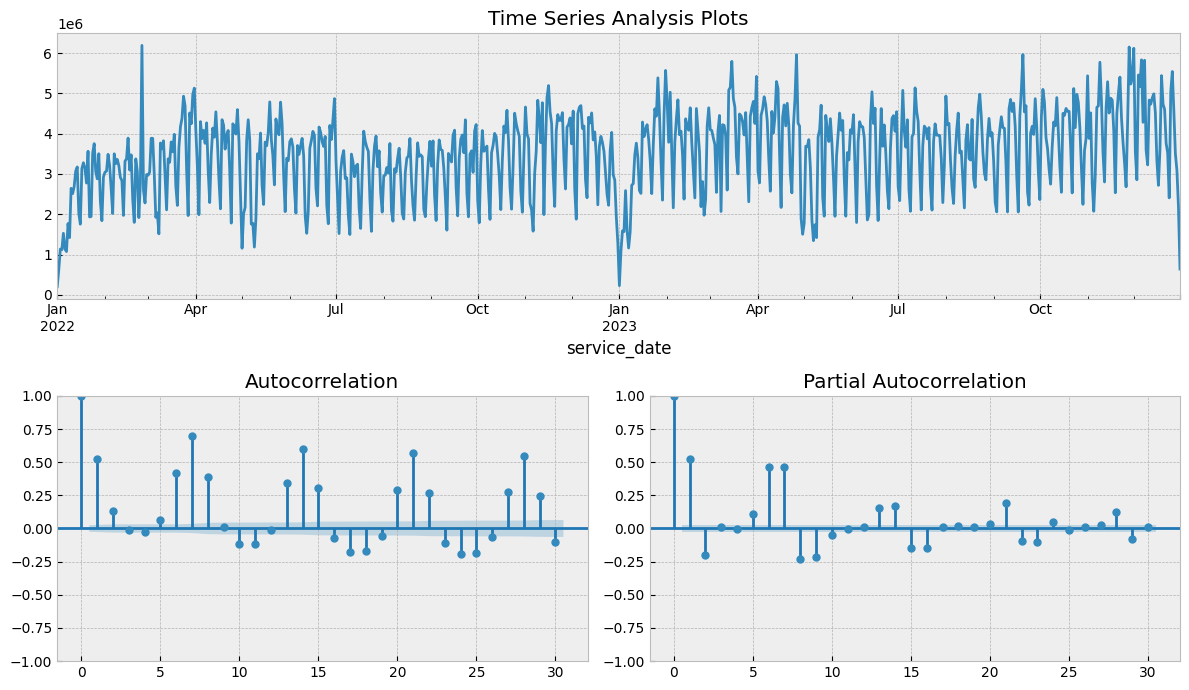

In [93]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Функция для анализа временного ряда
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

# Пример вызова функции
tsplot(aggregated_data['service_amount_net'], lags=30)

In [94]:
aggregated_data

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day,RPSS2023
service_date,,,,,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01,2022,1,1,0
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02,2022,1,2,0
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03,2022,1,3,0
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04,2022,1,4,0
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05,2022,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112,5.0,0,0,4.419597e+06,0.000000e+00,1702,0.000000,2023-12,2023-12-27,2023,12,27,0
2023-12-28,3503689.85,64,6.0,0,0,3.401974e+06,0.000000e+00,1458,0.000000,2023-12,2023-12-28,2023,12,28,0
2023-12-29,3089895.15,34,3.0,0,0,2.940942e+06,0.000000e+00,1317,0.000000,2023-12,2023-12-29,2023,12,29,0


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -173.093
Date:                Sun, 30 Mar 2025   AIC                            360.187
Time:                        12:18:12   BIC                            387.486
Sample:                             0   HQIC                           371.036
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7789      0.030     25.840      0.000       0.720       0.838
x2            -0.1944      0.029     -6.608      0.000      -0.252      -0.137
x3            -0.0384      0.034     -1.129      0.2

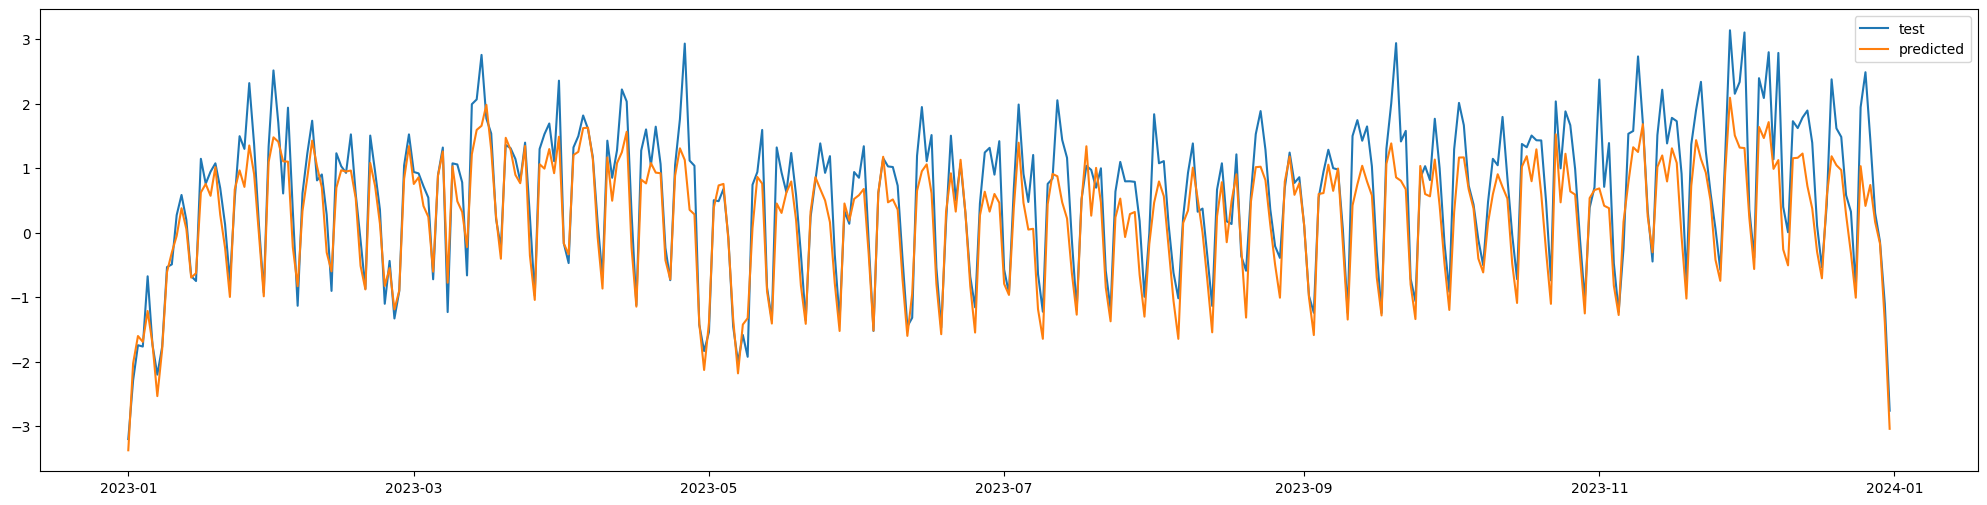

In [154]:
# 0   service_amount_net  730 non-null    float64  goal
#  1   is_hospital         730 non-null    int64   ??
#  2   weekday_name        730 non-null    float64 -
#  3   weekends            730 non-null    int64   +
#  4   holidays            730 non-null    int64   -
#  5   service_code_mean   730 non-null    float64 ???
#  6   delta_seconds       730 non-null    float64 +?
#  7   correction_count    730 non-null    int64   +
#  8   amount_std          730 non-null    float64 ???
#  9   service_date_month  730 non-null    object  -
#  10  date                730 non-null    object  -
#  11  year                730 non-null    int32   -
#  12  month               730 non-null    int32   +
#  13  day                 730 non-null    int32   -
#  14  RPSS2023            730 non-null    int64   ??
#      iflation                                    ?
#      akcii                                       ?



unique_months = aggregated_data['service_date_month'].unique()

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_train.drop(columns=['service_date_month'])
X_test.drop(columns=['service_date_month'])

y_train = X_train[['service_amount_net']]
y_test = X_test[['service_amount_net']]

X_train_ex=X_train[['correction_count', 'weekends', 'delta_seconds', 'month',]] # 'service_code_mean', 'amount_std', 'is_hospital',  'stock_price'  'holidays' |  'year', 'RPSS2023',
X_test_ex=X_test[['correction_count', 'weekends', 'delta_seconds', 'month',]] # 'service_code_mean', 'amount_std', 'is_hospital',  'stock_price'  'holidays' | 'year', 'RPSS2023',

#'year', 'month', 'hour', 'day', 'weekday_name', 'weekends',  'holidays',  'patient_id', 'service_code', 'service_name', 'is_hospital','delta_seconds', , 'service_name'

sd = StandardScaler()
X_train_ex = sd.fit_transform(X_train_ex)
X_test_ex = sd.transform(X_test_ex)

y_train = sd.fit_transform(y_train)
y_test = sd.transform(y_test)

mod = SARIMAX(y_train,
              exog=X_train_ex,
              order=(1, 0, 1), # 1, 0, 4
              trend=[0, 0], # 1, 0
              seasonal_order=(0, 0, 0, 12) # 1, 1, 1
              )

res = mod.fit()
print(res.summary())
forecast = res.forecast(steps=X_test.shape[0], exog=X_test_ex) #

plt.figure(figsize=(25, 6))

#plt.plot(X_train.index, y_train, label='train')
plt.plot(X_test.index, y_test, label='test')
plt.plot(X_test.index, forecast, label='predicted')
plt.legend()
plt.show()


# start = len(X_train)
# end = len(X_train) + len(X_test) - 1
# prediction = res.predict(start, end, exog=X_test_ex)

# prediction.index = X_test.index

# ax = X_test['service_amount_net'].plot(legend=True)
# prediction.plot(legend=True, ax=ax)


In [155]:
(sd.inverse_transform(forecast.reshape(-1, 1)) < 0).sum()

0

In [156]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

In [157]:
#Рассчитываем MSE и MAE
mse = mean_squared_error(X_test['service_amount_net'], forecast)
mae = mean_absolute_error(X_test['service_amount_net'], forecast)
mape = mean_absolute_percentage_error(X_test['service_amount_net'], forecast)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 15303108662466.463
MAE: 3768197.6848901776
MAPE: 1.0000000708958643


In [158]:
# Рассчитываем MSE и MAE
mse = mean_squared_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))
mae = mean_absolute_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))
mape = mean_absolute_percentage_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 253240095367.43237
MAE: 379061.3122221142
MAPE: 0.09856498556480221


In [159]:
X_test

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day,RPSS2023
service_date,,,,,,,,,,,,,,,
2023-01-01,228916.20,0,0.0,1,1,2.144253e+05,0.0,97,0.000000,2023-01,2023-01-01,2023,1,1,0
2023-01-02,1081582.63,30,2.0,0,1,1.058659e+06,0.0,552,0.000000,2023-01,2023-01-02,2023,1,2,0
2023-01-03,1588687.35,28,1.0,0,1,1.534063e+06,0.0,684,0.000000,2023-01,2023-01-03,2023,1,3,0
2023-01-04,1569189.89,26,5.0,0,1,1.624915e+06,0.0,681,0.000000,2023-01,2023-01-04,2023,1,4,0
2023-01-05,2587078.38,81,6.0,0,1,2.320429e+06,0.0,858,0.000000,2023-01,2023-01-05,2023,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112,5.0,0,0,4.419597e+06,0.0,1702,0.000000,2023-12,2023-12-27,2023,12,27,0
2023-12-28,3503689.85,64,6.0,0,0,3.401974e+06,0.0,1458,0.000000,2023-12,2023-12-28,2023,12,28,0
2023-12-29,3089895.15,34,3.0,0,0,2.940942e+06,0.0,1317,0.000000,2023-12,2023-12-29,2023,12,29,0


In [160]:
X_month = X_test[['service_amount_net', 'service_date_month']]
X_month['forecast'] = sd.inverse_transform(forecast.reshape(-1, 1))
X_month_agg = X_month.groupby('service_date_month').agg({
    'service_amount_net': 'sum',
    'forecast': 'sum'
})
print('MAE: ', mean_absolute_error(X_month_agg['service_amount_net'], X_month_agg['forecast']))
print('MAPE: ', mean_absolute_percentage_error(X_month_agg['service_amount_net'], X_month_agg['forecast']))

MAE:  10105418.5391515
MAPE:  0.08670029017684322


<ipython-input-160-c66ff6650b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_month['forecast'] = sd.inverse_transform(forecast.reshape(-1, 1))


In [186]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):
    # Разделение данных на тренировочные и тестовые
    X_train_cv, X_test_cv = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv = X_train_cv[['service_amount_net']]
    y_test_cv = X_test_cv[['service_amount_net']]

    # Выбор экзогенных переменных
    X_train_ex_cv = X_train_cv[['correction_count', 'weekends', 'delta_seconds', 'month']] # inflation   ||| 'service_code_mean', 'correction_count', 'amount_std', 'is_hospital', 'weekends', 'RPSS2023', 'year', 'stock_price'
    X_test_ex_cv = X_test_cv[['correction_count', 'weekends', 'delta_seconds', 'month']] #

    # Стандартизация данных
    sd = StandardScaler()
    X_train_ex_cv = sd.fit_transform(X_train_ex_cv)
    X_test_ex_cv = sd.transform(X_test_ex_cv)

    y_train_cv_scaled = sd.fit_transform(y_train_cv)
    y_test_cv_scaled = sd.transform(y_test_cv)

    # Обучение модели SARIMAX
    mod = SARIMAX(
        y_train_cv_scaled,
        exog=X_train_ex_cv,
        order=(1, 0, 1),
        trend=[0, 0],
        seasonal_order=(0, 0, 0, 12)
    )
    res = mod.fit(disp=False)

    # Прогнозирование
    forecast_cv = res.forecast(steps=len(X_test_cv), exog=X_test_ex_cv)

    # Обратное преобразование прогнозов и тестовых значений
    y_test_cv_original = sd.inverse_transform(y_test_cv_scaled.reshape(-1, 1))
    forecast_cv_original = sd.inverse_transform(forecast_cv.reshape(-1, 1))

    # Вычисление метрик
    mae = mean_absolute_error(y_test_cv_original, forecast_cv_original)
    mape = mean_absolute_percentage_error(y_test_cv_original, forecast_cv_original)

    # Сохранение метрик
    mae_scores.append(mae)
    mape_scores.append(mape)

# Вывод средних метрик
print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

Среднее MAE: 293525.43992763624
Среднее MAPE: 0.08384622423937238


Критерий Дики-Фуллера: p=0.001877


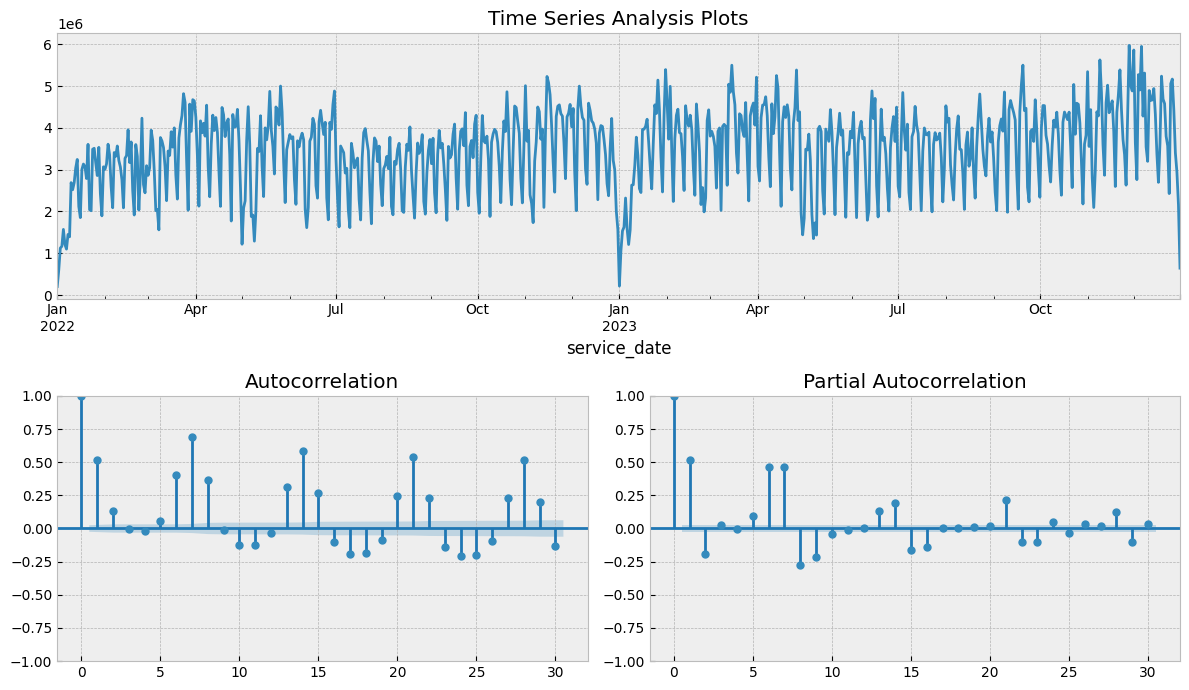

In [163]:
tsplot(aggregated_data['service_code_mean'], lags=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.659
Date:                Sun, 30 Mar 2025   AIC                            503.318
Time:                        12:31:30   BIC                            534.517
Sample:                             0   HQIC                           515.717
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6148      0.024    -25.372      0.000      -0.662      -0.567
x2             0.1022      0.153      0.668      0.504      -0.198       0.402
x3             0.1034      0.028      3.662      0.0

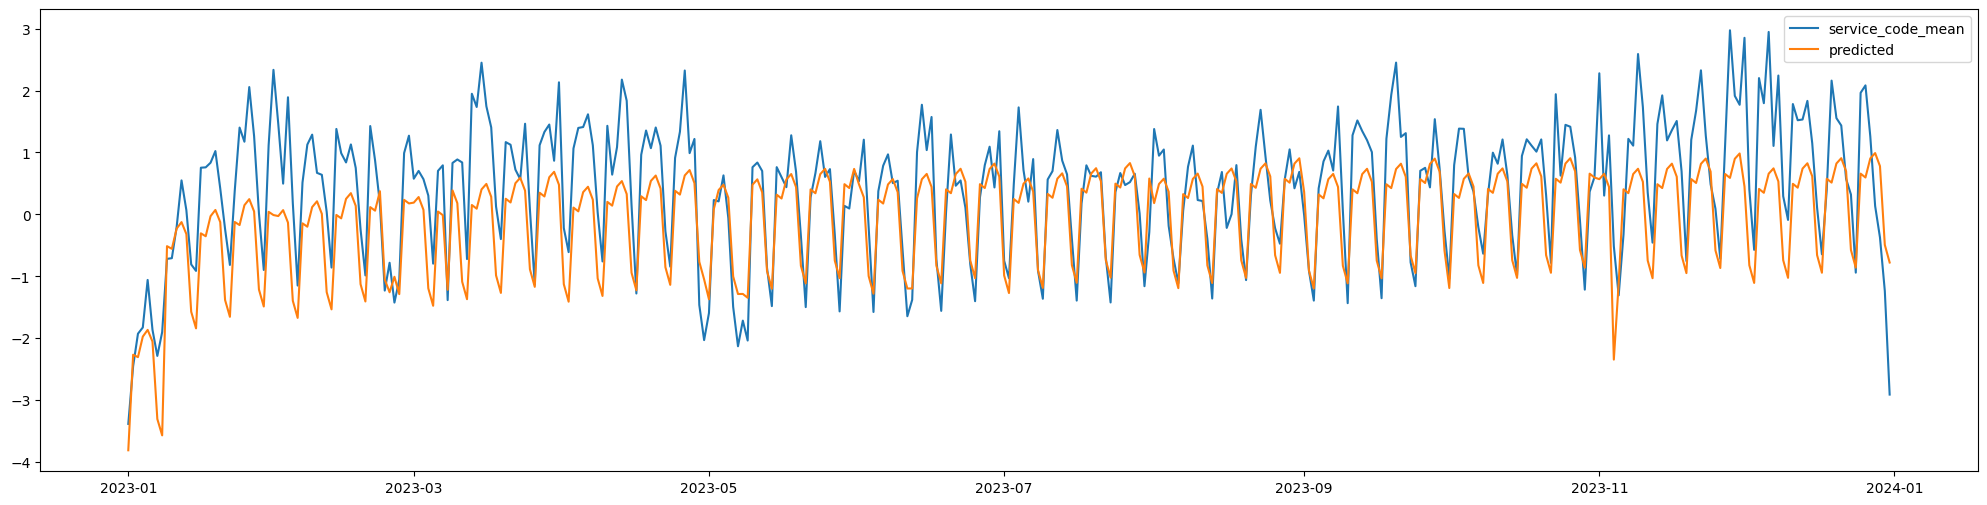

In [183]:
unique_months = aggregated_data['service_date_month'].unique()



#  2   weekday_name        730 non-null    float64   +
#  3   weekends            730 non-null    float64   +
#  4   holidays            730 non-null    float64   +
#  11  year                730 non-null    float64   -
#  12  month               730 non-null    float64   +
#  13  day                 730 non-null    float64   +
#  14  inflation           730 non-null    float64   ?
#  15  RPSS2023            730 non-null    int64     -
#  16  stock_price         730 non-null    float64   ?

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_code_mean_train.drop(columns=['service_date_month'])
X_code_mean_test.drop(columns=['service_date_month'])

y_code_mean_train = X_code_mean_train[['service_code_mean']]
y_code_mean_test = X_code_mean_test[['service_code_mean']]

X_code_mean_train_ex=X_code_mean_train[['weekends', 'month', 'day', 'weekday_name', 'holidays']] #
X_code_mean_test_ex=X_code_mean_test[['weekends', 'month', 'day', 'weekday_name', 'holidays']] #

#'year', 'month', 'hour', 'day', 'weekday_name', 'weekends',  'holidays',  'patient_id', 'service_code', 'service_name', 'is_hospital','delta_seconds', , 'service_name'

sd = StandardScaler()
X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

y_code_mean_train = sd.fit_transform(y_code_mean_train)
y_code_mean_test = sd.transform(y_code_mean_test)

model_code_mean = SARIMAX(y_code_mean_train,
              exog=X_code_mean_train_ex,
              order=(1, 0, 1), # 1, 0, 4
              trend=[0, 0], # 1, 0
              seasonal_order=(0, 0, 0, 12) # 1, 1, 1
              )

res_code_mean = model_code_mean.fit()
print(res_code_mean.summary())
forecast_code_mean = res_code_mean.forecast(steps=X_code_mean_test.shape[0], exog=X_code_mean_test_ex) #

plt.figure(figsize=(25, 6))

#plt.plot(X_train.index, y_train, label='train')
# plt.plot(X_test.index, y_test, label='service_amount_net')
plt.plot(X_code_mean_test.index, y_code_mean_test, label='service_code_mean')
plt.plot(X_code_mean_test.index, forecast_code_mean, label='predicted')
plt.legend()
plt.show()

In [184]:
mse = mean_squared_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))
mae = mean_absolute_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))
mape = mean_absolute_percentage_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 546997111271.42755
MAE: 587544.3345050939
MAPE: 0.17025921513959538


In [65]:
!pip uninstall numpy catboost -y
!pip install numpy==1.23.5 catboost==1.2

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: catboost 1.2
Uninstalling catboost-1.2:
  Successfully uninstalled catboost-1.2
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl (98.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is inc

In [66]:
from catboost import CatBoostRegressor

In [185]:
X_code_mean_train

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date,year,month,day,RPSS2023
service_date,,,,,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01,2022,1,1,0
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02,2022,1,2,0
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03,2022,1,3,0
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04,2022,1,4,0
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05,2022,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,4032176.11,148,1.0,0,0,4.224737e+06,0.000000e+00,1656,0.000000,2022-12,2022-12-27,2022,12,27,0
2022-12-28,2978966.11,220,5.0,0,0,3.221128e+06,0.000000e+00,1370,0.000000,2022-12,2022-12-28,2022,12,28,0
2022-12-29,2848937.35,112,6.0,0,0,2.992648e+06,0.000000e+00,1155,0.000000,2022-12,2022-12-29,2022,12,29,0


0:	learn: 0.3477049	total: 256us	remaining: 128ms
1:	learn: 0.3457163	total: 900us	remaining: 224ms
2:	learn: 0.3438442	total: 1.17ms	remaining: 194ms
3:	learn: 0.3420265	total: 1.4ms	remaining: 173ms
4:	learn: 0.3400994	total: 1.54ms	remaining: 152ms
5:	learn: 0.3381598	total: 1.71ms	remaining: 140ms
6:	learn: 0.3363007	total: 1.88ms	remaining: 133ms
7:	learn: 0.3345314	total: 2.13ms	remaining: 131ms
8:	learn: 0.3328330	total: 2.56ms	remaining: 140ms
9:	learn: 0.3312528	total: 2.84ms	remaining: 139ms
10:	learn: 0.3294722	total: 3.02ms	remaining: 134ms
11:	learn: 0.3277463	total: 3.18ms	remaining: 129ms
12:	learn: 0.3259724	total: 3.44ms	remaining: 129ms
13:	learn: 0.3243098	total: 3.82ms	remaining: 133ms
14:	learn: 0.3226234	total: 4.02ms	remaining: 130ms
15:	learn: 0.3209220	total: 4.18ms	remaining: 127ms
16:	learn: 0.3191853	total: 4.38ms	remaining: 124ms
17:	learn: 0.3177073	total: 4.87ms	remaining: 130ms
18:	learn: 0.3160736	total: 5.08ms	remaining: 129ms
19:	learn: 0.3144880	tota

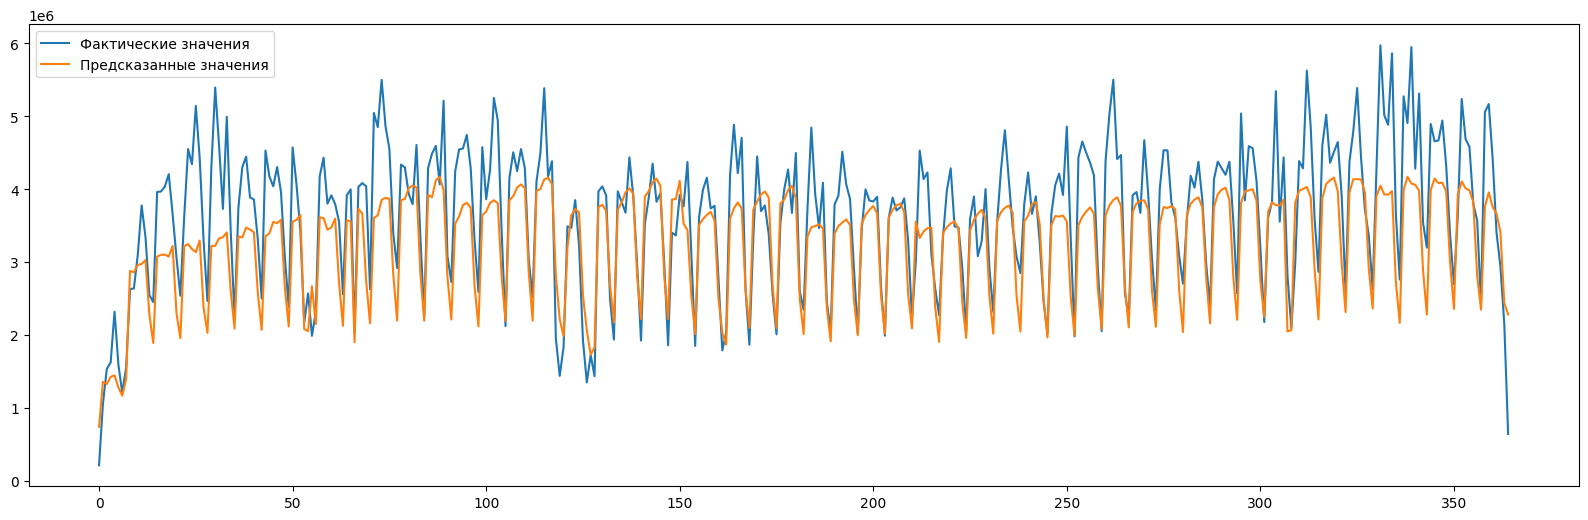

MAE: 510637.18680790754
MAPE: 0.1465255219253557


In [208]:
unique_months = aggregated_data['service_date_month'].unique()

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_code_mean_train.drop(columns=['service_date_month'])
X_code_mean_test.drop(columns=['service_date_month'])

y_code_mean_train = X_code_mean_train[['service_code_mean']]
y_code_mean_test = X_code_mean_test[['service_code_mean']]

X_code_mean_train_ex=X_code_mean_train[['weekends', 'month', 'day', 'weekday_name', 'holidays']] # , 'year', 'RPSS2023'
X_code_mean_test_ex=X_code_mean_test[['weekends', 'month', 'day', 'weekday_name', 'holidays',]] #  'year', 'RPSS2023'

# sd = StandardScaler()
# X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
# X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

# y_code_mean_train = sd.fit_transform(y_code_mean_train)
# y_code_mean_test = sd.transform(y_code_mean_test)

cat_model = CatBoostRegressor(
     depth=8,
     iterations= 500,
     l2_leaf_reg=3,
     learning_rate= 0.01
)
# cat_model.fit(X_code_mean_train_ex, y_code_mean_train)
# predict_cat_model =  cat_model.predict(X_code_mean_test_ex)

y_code_mean_train_log = np.log1p(y_code_mean_train)
y_code_mean_test_log = np.log1p(y_code_mean_test)

cat_model.fit(X_code_mean_train_ex, y_code_mean_train_log)
predict_cat_model_log = cat_model.predict(X_code_mean_test_ex)


# Обратное преобразование
predict_cat_model = np.expm1(predict_cat_model_log)
mae = mean_absolute_error(y_code_mean_test, predict_cat_model)
mape = mean_absolute_percentage_error(y_code_mean_test, predict_cat_model)

plt.figure(figsize=(20, 6))
plt.plot(y_code_mean_test.values, label='Фактические значения')
plt.plot(predict_cat_model, label='Предсказанные значения')
plt.legend()
plt.show()

print(f'MAE: {mae}')
print(f'MAPE: {mape}')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [250, 400, 500, 750, 1000, 1250],
    'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10, 12],
    'l2_leaf_reg': [1, 2,  3, 5, 6]
}

grid_search = GridSearchCV(CatBoostRegressor(verbose=0), param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search.fit(aggregated_data[['weekends', 'month', 'day', 'weekday_name', 'holidays']], aggregated_data['service_code_mean'])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение MAE:", -grid_search.best_score_)

In [70]:
y_code_mean_train

,service_code_mean
0,2.023296e+05
1,6.034493e+05
2,1.123005e+06
3,1.165825e+06
4,1.570067e+06
...,...
541,3.526557e+06
542,3.998835e+06
543,4.269622e+06
544,3.673257e+06


In [113]:
def score(p, q, d, a0, a1, P, Q, D):
    mod = SARIMAX(
        endog = y_code_mean_train,
        exog=X_code_mean_train_ex,
        order=(p, d, q),
        trend=[a0, a1],
        seasonal_order=(P, D, Q, 12)
    )

    res = mod.fit()

    forecast = res.forecast(steps=X_code_mean_test.shape[0], exog=X_code_mean_test_ex)

    aic = res.aic
    # mae_error = mean_absolute_error(X_test['service_amount_net'], forecast)
    # mape_error = mean_absolute_percentage_error(X_test['service_amount_net'], forecast)

    return aic # mae_error, mape_error
f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
f0

np.float64(763.7382372733714)

In [ ]:
import warnings

# Игнорировать все предупреждения
warnings.filterwarnings("ignore")

f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
# best_MAE = f0[0]
# best_MAPE=f0[1]
best_params = [0, 0, 0, 0, 0, 0, 0, 0]
best_aic = f0
train_months = unique_months[:12]
test_months = unique_months[-12:]

X_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_train.drop(columns=['service_date_month'])
X_test.drop(columns=['service_date_month'])

y_train = X_train[['service_amount_net']]
y_test = X_test[['service_amount_net']]

X_train_ex=X_train[['service_code_mean', 'correction_count', 'amount_std', 'is_hospital']]
X_test_ex=X_test[['service_code_mean', 'correction_count', 'amount_std', 'is_hospital']]

sd = StandardScaler()
X_train_ex = sd.fit_transform(X_train_ex)
X_test_ex = sd.transform(X_test_ex)

y_train = sd.fit_transform(y_train)
y_test = sd.transform(y_test)

for p in range(7):
    for q in range(7):
        for d in range(2):
            for a0 in range(2):
                for a1 in range(2):
                    for P in range(2):
                        for Q in range(2):
                            for D in range(2):
                                f1 = score(p, q, d, a0, a1, P, Q, D)
                                if f1 < f0: # f1[0] < f0[0] and f1[1] < f0[1]
                                    f0 = f1
                                    #best_MAE = f0[0]
                                    #best_MAPE= f0[1]
                                    best_aic = f0
                                    best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}
                                # else:
                                #     if np.random.random() < 2**(-(f1[0]-f0[0])/temperature):
                                #         f0 = f1
                                #         best_MAE = f0[0]
                                #         best_MAPE= f0[1]
                                #         best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}

                                #print(f'best_MAE: {best_MAE:.2f}, best_MAPE: {best_MAPE:.4f}, best_params: {best_params}, current_MAE: {f1[0]:.2f}, current_MAPE: {f1[1]:.4f}')
                                print(f'best_AIC: {best_aic}, best_params: {best_params}, current_AIC: {f1}, current_params: p: {p}, d: {d}, q: {q}, a0: {a0}, a1: {a1}, P: {P}, D: {D}, Q: {Q}')

best_AIC: -325.02958136448444, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: -325.02958136448444, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 0, Q: 0
best_AIC: -325.02958136448444, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: -325.02958136448444, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 1, Q: 0
best_AIC: -325.02958136448444, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: -325.02958136448444, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 0, Q: 1
best_AIC: -325.02958136448444, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: -325.02958136448444, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 1, Q: 1
best_AIC: -325.02958136448444, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: -325.02958136448444, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 1, D: 0, Q: 0
best_AIC: -325.02958136448444, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: -325.02958136448444, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 

KeyboardInterrupt: 

In [ ]:
import warnings

# Игнорировать все предупреждения
warnings.filterwarnings("ignore")

f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
# best_MAE = f0[0]
# best_MAPE=f0[1]
best_params = [0, 0, 0, 0, 0, 0, 0, 0]
best_aic = f0
train_months = unique_months[:12]
test_months = unique_months[-12:]

X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_code_mean_train.drop(columns=['service_date_month'])
X_code_mean_test.drop(columns=['service_date_month'])

y_code_mean_train = X_train[['service_code_mean']]
y_code_mean_test = X_test[['service_code_mean']]

X_code_mean_train_ex=X_code_mean_train[['weekends', 'RPSS2023', 'year', 'stock_price']]
X_code_mean_test_ex=X_code_mean_test[['weekends', 'RPSS2023', 'year', 'stock_price']]

sd = StandardScaler()
X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

y_code_mean_train = sd.fit_transform(y_code_mean_train)
y_code_mean_test = sd.transform(y_code_mean_test)

for p in range(7):
    for q in range(7):
        for d in range(2):
            for a0 in range(2):
                for a1 in range(2):
                    for P in range(2):
                        for Q in range(2):
                            for D in range(2):
                                f1 = score(p, q, d, a0, a1, P, Q, D)
                                if f1 < f0: # f1[0] < f0[0] and f1[1] < f0[1]
                                    f0 = f1
                                    #best_MAE = f0[0]
                                    #best_MAPE= f0[1]
                                    best_aic = f0
                                    best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}
                                # else:
                                #     if np.random.random() < 2**(-(f1[0]-f0[0])/temperature):
                                #         f0 = f1
                                #         best_MAE = f0[0]
                                #         best_MAPE= f0[1]
                                #         best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}

                                #print(f'best_MAE: {best_MAE:.2f}, best_MAPE: {best_MAPE:.4f}, best_params: {best_params}, current_MAE: {f1[0]:.2f}, current_MAPE: {f1[1]:.4f}')
                                print(f'best_AIC: {best_aic}, best_params: {best_params}, current_AIC: {f1}, current_params: p: {p}, d: {d}, q: {q}, a0: {a0}, a1: {a1}, P: {P}, D: {D}, Q: {Q}')

best_AIC: 763.7382372733714, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: 763.7382372733714, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 0, Q: 0
best_AIC: 763.7382372733714, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: 763.7382372733714, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 1, Q: 0
best_AIC: 763.7382372733714, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: 763.7382372733714, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 0, Q: 1
best_AIC: 763.7382372733714, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: 763.7382372733714, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 0, D: 1, Q: 1
best_AIC: 763.7382372733714, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: 763.7382372733714, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 1, D: 0, Q: 0
best_AIC: 763.7382372733714, best_params: [0, 0, 0, 0, 0, 0, 0, 0], current_AIC: 763.7382372733714, current_params: p: 0, d: 0, q: 0, a0: 0, a1: 0, P: 1, D: 1, Q: 0
best_AIC: 

In [ ]:
data.loc[data['service_name'] == '0x95758EBA87326C4D5DECC8B51A8B9C61', 'service_code'].value_counts()

,count
service_code,
0xCDEA5658E0AD52E1700653CAE2A4928D,16672
0x332E8D3220A5317B23558A5E79CE00E4,14697
0x54054703A9278593F2C779D0E128A3A6,10993
0x4F8A79924D1B8D817FC07D5B0814052F,9838
0xC9178011BA3F7F60E28BFE503478E35B,9342
...,...
0x568FF715DB8FE40C0B9B3DA180C4C66C,1
0x9519892AD1A8B70EBCBB0FAF83D83AEC,1
0xE203F53A177646EA53E7C3D090367EE2,1


interval columns not set, guessing: ['service_amount_net', 'is_hospital', 'weekday_name', 'weekends', 'holidays', 'service_code_mean', 'delta_seconds', 'correction_count', 'amount_std', 'year', 'month', 'day', 'inflation', 'RPSS2023', 'stock_price']


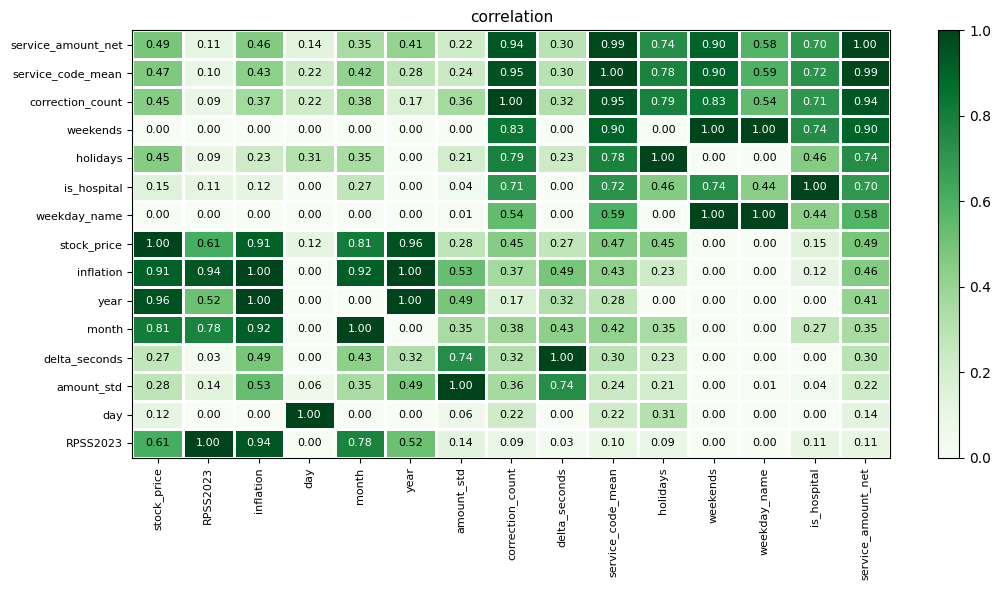

In [ ]:
p_o = aggregated_data.drop(columns=['date', 'service_date_month']).phik_matrix().round(2).sort_values('service_amount_net')

plot_correlation_matrix(p_o.values,
                        x_labels=p_o.columns,
                        y_labels=p_o.index,
                        vmin=0,
                        vmax=1,
                        color_map="Greens",
                        fontsize_factor=0.8,
                        figsize=(11, 6)
                        )
plt.tight_layout()

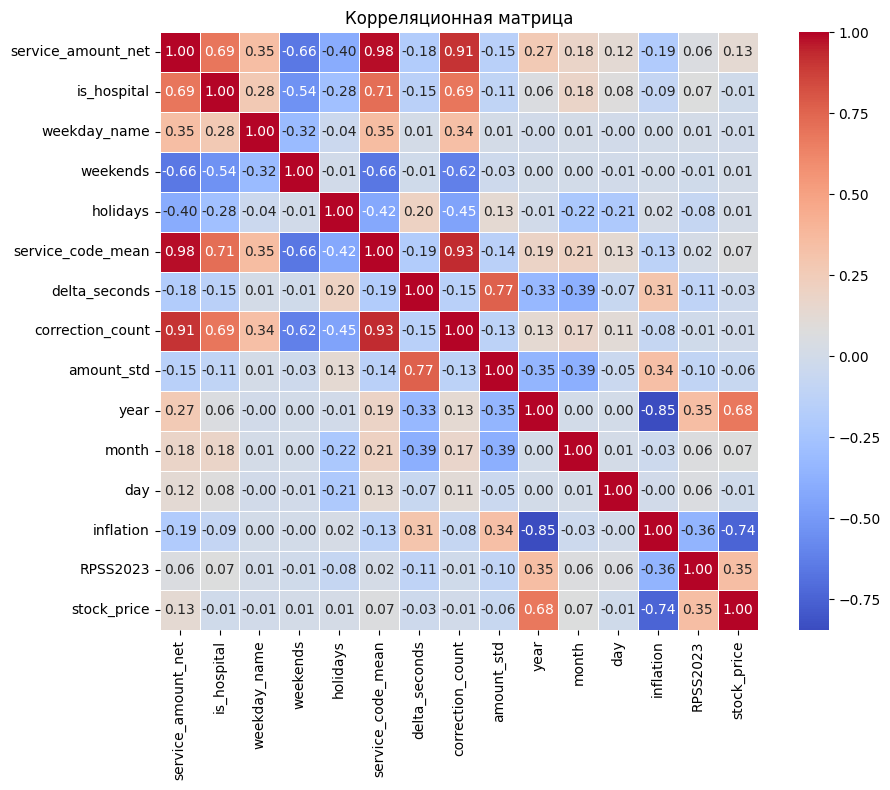

In [ ]:
columns_to_exclude = ['service_document_id', 'account_document_id', 'service_date', 'date', 'time', 'patient_id', 'service_code', 'service_name', 'weekday_name',]
data_reduced = aggregated_data.drop(columns=['date', 'service_date_month'])

# Вычисляем корреляционную матрицу
correlation_matrix = data_reduced.corr()

# Визуализируем корреляционную матрицу с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Отображение значений корреляции на тепловой карте
    fmt=".2f",             # Формат отображения чисел (до двух знаков после запятой)
    cmap="coolwarm",       # Цветовая палитра
    cbar=True,             # Добавление цветовой шкалы
    square=True,           # Квадратные ячейки
    linewidths=0.5         # Ширина линий между ячейками
)
plt.title("Корреляционная матрица")  # Заголовок графика
plt.tight_layout()                   # Улучшение компоновки
plt.show()

In [ ]:
data.loc[data['service_code'] == '0xCDEA5658E0AD52E1700653CAE2A4928D', 'service_name'].value_counts()

,count
service_name,
0x95758EBA87326C4D5DECC8B51A8B9C61,16780


Получается, service_name - категории, а service_code - подкатегории в этих категориях

In [ ]:
data['service_document_id'].value_counts()[data['service_document_id'].value_counts() > 1]#.loc[data['service_document_id'].value_counts()['count'] > 1]

,count
service_document_id,
0x15075263622836BE21F6ACB4FA8E4BF3,5
0x864FB272E89454CD72197128F400BAAC,3
0x633F8A146E95A4D3658B22B260C75196,3
0xBE186EFDA44422D591A558F8CBE28564,3
0xDA04A42EC25E7DF616078B7DA0E8FC5E,3
...,...
0x73E0EAEAC5E8E5283C798E394D1F29DB,2
0x78AB2DBC1B41C19920E934B5401E71B2,2
0xD6E1F1B7FC9447677271FAB94421F536,2


In [ ]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,2022-07-31,18:07:00
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:31
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:31
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:57
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:57


In [ ]:
data['patient_id'].value_counts()

,count
patient_id,
0x037AB9CF4BAF80A173679FB9761A113D,4121
0xAECAFBEC992080A28B6351DC1E1551C2,2165
0x274B520D2D54E1604C6E69410A728CE0,1959
0xEA73B2A80C0D9647C3ABFA65195CFCBE,1951
0x53A2C720806E07E267EE2E32C7EEB8DF,1324
...,...
0xD1DFCC0E52753F953BEF98BC629E916B,1
0x1FAE39ACE7A65D71654A89B62643861F,1
0x028EDAC6500596FC82AF669C3CC0E973,1


In [ ]:
def add_rpss2022(date):
    return 1 if pd.Timestamp("2022-11-28") <= date <= pd.Timestamp("2023-01-31") else 0

def add_save25(date):
    return 1 if pd.Timestamp("2022-02-04") <= date <= pd.Timestamp("2022-02-20") else 0

def add_dedmraz(date):
    return 1 if pd.Timestamp("2022-01-01") <= date <= pd.Timestamp("2022-01-20") else 0

def add_greenday(date):
    return 1 if pd.Timestamp("2023-11-09") <= date <= pd.Timestamp("2023-11-12") else 0

def add_skidkanastrovku(date):
    return 1 if pd.Timestamp("2023-10-10") <= date <= pd.Timestamp("2023-11-08") else 0

def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13") <= date <= pd.Timestamp("2023-08-31") else 0

def add_sberagifinancy(date):
    return 1 if pd.Timestamp("2023-05-29") <= date <= pd.Timestamp("2023-07-09") else 0

In [ ]:
data["RPSS2022"] = data["service_date"].apply(add_rpss2022)
data["SAVE25"] = data["service_date"].apply(add_save25)
data["DEDMRAZ"] = data["service_date"].apply(add_dedmraz)
data["GREENDAY"] = data["service_date"].apply(add_greenday)
data["SKIDKANASTRAHOVKU"] = data["service_date"].apply(add_skidkanastrovku)
data["RPSS2023"] = data["service_date"].apply(add_rpss2023)
data["SBEREGIFINANCY"] = data["service_date"].apply(add_sberagifinancy)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_cols = ['service_amount_net', "RPSS2022", "SAVE25", "DEDMRAZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]

<Axes: >

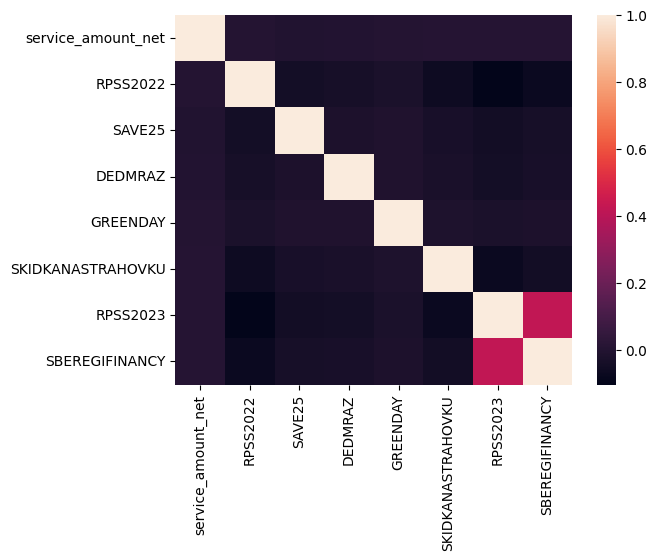

In [ ]:
corr = data[num_cols].corr()
sns.heatmap(corr)

In [ ]:
data.isna().sum()

,0
service_document_id,0
account_document_id,0
service_date,0
service_amount_net,0
patient_id,0
service_code,0
service_name,0
is_hospital,0
year,0
month,0


In [ ]:
import numpy as np

In [ ]:
data.to_csv('/content/drive/MyDrive/data_akcii.csv')

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(data[['service_amount_net']])
for i in range(len(akcii)):
    y = data[akcii[i]]

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    # Выводим результаты
    #print(result.summary())

    # Псевдо-R^2 (например, McFadden's R^2)
    pseudo_r2 = result.prsquared
    print(f'\n{akcii[i]}: \n')
    print(f"Pseudo R-squared: {pseudo_r2}")

    # Проверка статистической значимости модели
    # Likelihood Ratio Test (LR-test)
    llr_pvalue = result.llr_pvalue
    print(f"p-value for Likelihood Ratio Test: {llr_pvalue} \n")

Optimization terminated successfully.
         Current function value: 0.284132
         Iterations 6

RPSS2022: 

Pseudo R-squared: 9.495413614279968e-07
p-value for Likelihood Ratio Test: 0.442915528815946 

Optimization terminated successfully.
         Current function value: 0.100813
         Iterations 8

SAVE25: 

Pseudo R-squared: 0.00013740934818640138
p-value for Likelihood Ratio Test: 3.8337614495753936e-08 

Optimization terminated successfully.
         Current function value: 0.081109
         Iterations 8

DEDMRAZ: 

Pseudo R-squared: 8.271009884153191e-05
p-value for Likelihood Ratio Test: 0.00013013070340856268 

Optimization terminated successfully.
         Current function value: 0.032651
         Iterations 9

GREENDAY: 

Pseudo R-squared: 2.752545251694105e-05
p-value for Likelihood Ratio Test: 0.16138745529000997 

Optimization terminated successfully.
         Current function value: 0.174162
         Iterations 7

SKIDKANASTRAHOVKU: 

Pseudo R-squared: 5.810494

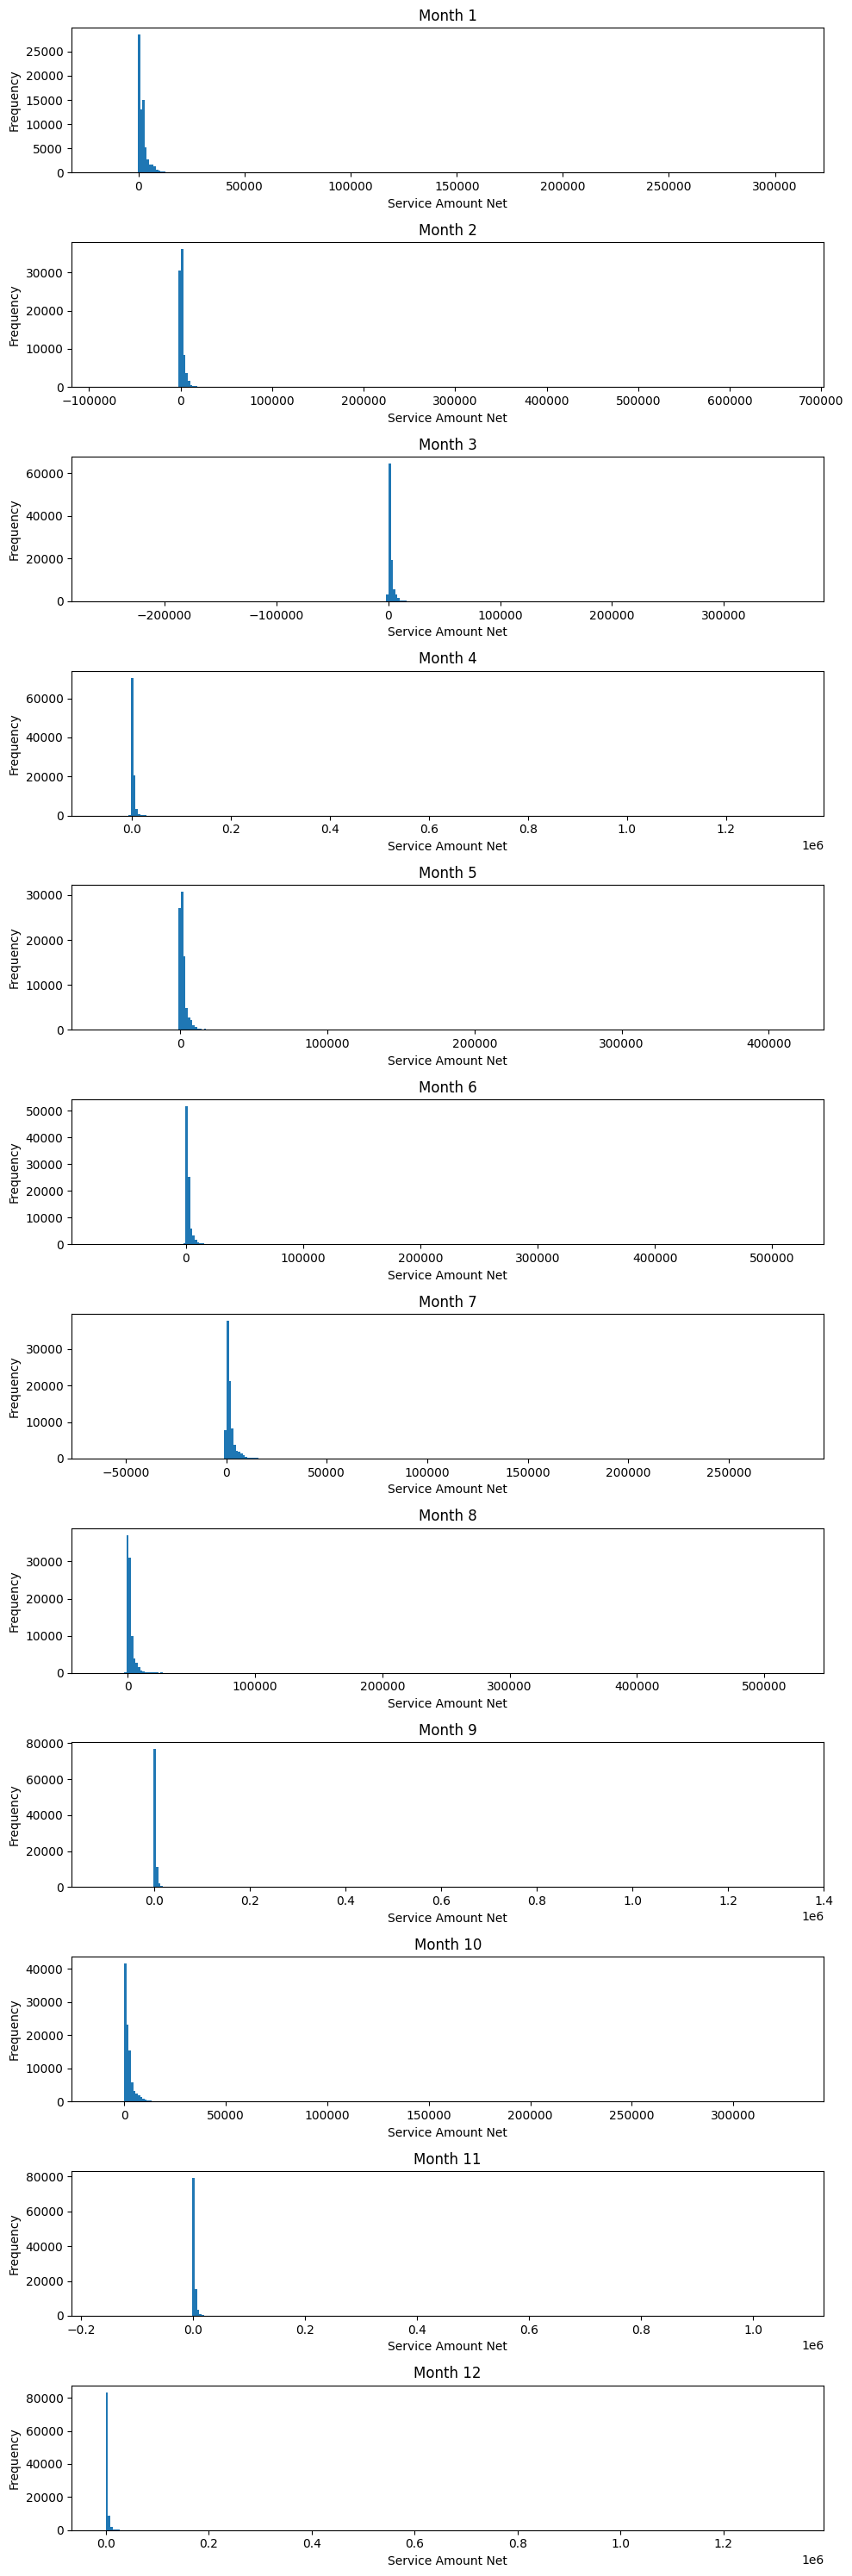

In [ ]:
fig, axes = plt.subplots(12, 1, figsize=(10, 30))
for i in range(1, 13):
    data_month = data.loc[(data['month'] == i) &
                         (data['service_amount_net'] > -10000000) &
                         (data['service_amount_net'] < 10000000)]
    axes[i-1].hist(data_month['service_amount_net'], bins=300)
    axes[i-1].set_title(f'Month {i}')
    axes[i-1].set_xlabel('Service Amount Net')
    axes[i-1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()